<a href="https://colab.research.google.com/github/AARomanow/wiki/blob/main/Caltech101_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

extract_path = "/content/caltech-101"  # Specify the desired extraction path

if not os.path.exists(extract_path):
    os.makedirs(extract_path)

In [2]:
import os

# List files in the directory
files = os.listdir('/content')
print(files)


['.config', 'caltech-101', 'sample_data']


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

drive_path = "/content/drive/MyDrive"  # Update the base path if needed

files = os.listdir(drive_path)
print(files)

['Preliminary App Issaquah 2009.gdoc', 'The Odyssey outline v4.gdoc', 'Essie Mind Map.gdraw', 'Copy of Essie Mind Map.gdraw', 'paragraph 2.docx', 'paragraph 2.docx.gdoc', 'Hospitality Topic.docx', 'Hospitality Topic.docx.gdoc', 'Hospitality Group Work.rtf', 'Hospitality Group Work.rtf.gdoc', 'Diet & Nutrition Questionnaire2.docx', 'Diet & Nutrition Questionnaire2.gdoc', 'Weekly Check In Form Basic Training and 6 Week Programs.docx', 'Weekly Check In Form Basic Training and 6 Week Programs.docx.gdoc', 'week 1 check in .webarchive', 'finalproject_v1.psd', 'finalprojectv2.psd', 'Blank Application.doc', 'Blank Application (1).doc.gdoc', 'Blank Application.doc.gdoc', 'Ali resume  .docx', 'Ali resume   (3).docx.gdoc', 'Ali resume   (2).docx.gdoc', 'Ali resume   (1).docx.gdoc', 'Ali resume  .docx.gdoc', 'referneces .gdoc', 'Ali resume  .gdoc', 'Personal Share - MASTER.gdoc', 'HO-CourseOutline.doc', 'predicted result graph.PNG', 'results 2.PNG', 'experiment 2 results graph.PNG', 'IMMI Grant No

In [5]:
import shutil

zip_file_path = "/content/drive/MyDrive/caltech-101.zip"  # Update with the path and name of your zip file
destination_path = "/content/caltech-101.zip"  # Update with the desired destination path and name in Colab

shutil.copy(zip_file_path, destination_path)

'/content/caltech-101.zip'

In [6]:
import zipfile

extract_path = "/content/extracted_files"  # Update with the desired extraction path

with zipfile.ZipFile(destination_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [7]:
import tarfile

# specify paths to the tar.gz files
objects_tar_gz = 'extracted_files/caltech-101/101_ObjectCategories.tar.gz'
annotations_tar = 'extracted_files/caltech-101/Annotations.tar'

# extract the object categories images
with tarfile.open(objects_tar_gz, 'r:gz') as tar:
    tar.extractall(path='extracted_files/caltech-101')

# extract the annotations
with tarfile.open(annotations_tar, 'r:') as tar:
    tar.extractall(path='extracted_files/caltech-101')

In [8]:
base_dir = 'extracted_files/caltech-101/101_ObjectCategories'

In [9]:
original_image_dir = "extracted_files/caltech-101/101_ObjectCategories"
annotation_dir = "extracted_files/caltech-101/Annotations"
split_dataset_dir = "caltech-101" 

In [10]:
original_image_dir = "extracted_files/caltech-101/101_ObjectCategories"
annotation_dir = "extracted_files/caltech-101/Annotations"
split_dataset_dir = "caltech-101"


In [16]:

import os
import tarfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Specify paths to the tar.gz files
objects_tar_gz = 'extracted_files/caltech-101/101_ObjectCategories.tar.gz'
annotations_tar = 'extracted_files/caltech-101/Annotations.tar'

# Extract the object categories images
with tarfile.open(objects_tar_gz, 'r:gz') as tar:
    tar.extractall(path='extracted_files/caltech-101')

# Extract the annotations
with tarfile.open(annotations_tar, 'r:') as tar:
    tar.extractall(path='extracted_files/caltech-101')

base_dir = 'extracted_files/caltech-101/101_ObjectCategories'
split_dataset_dir = 'caltech-101'

# Get a list of all image file paths and labels
image_files = []
labels = []

for category in os.listdir(base_dir):
    category_dir = os.path.join(base_dir, category)
    if os.path.isdir(category_dir):
        for file in os.listdir(category_dir):
            if file.endswith('.jpg'):
                image_files.append(os.path.join(category_dir, file))
                labels.append(category)

# Perform one-hot encoding on the labels
encoder = OneHotEncoder(sparse=False)
labels_encoded = encoder.fit_transform([[label] for label in labels])

# Split the data into train, validation, and test sets with stratification
train_files, test_files, train_labels, test_labels = train_test_split(
    image_files, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)
train_files, val_files, train_labels, val_labels = train_test_split(
    train_files, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

# Move the files to their respective directories
train_dir = os.path.join(split_dataset_dir, 'train')
val_dir = os.path.join(split_dataset_dir, 'validation')
test_dir = os.path.join(split_dataset_dir, 'test')

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Move train files
for file in train_files:
    target_path = os.path.join(train_dir, os.path.relpath(file, base_dir))
    os.makedirs(os.path.dirname(target_path), exist_ok=True)
    os.rename(file, target_path)

# Move validation files
for file in val_files:
    target_path = os.path.join(val_dir, os.path.relpath(file, base_dir))
    os.makedirs(os.path.dirname(target_path), exist_ok=True)
    os.rename(file, target_path)

# Move test
# Move test files
for file in test_files:
    target_path = os.path.join(test_dir, os.path.relpath(file, data_path))
    os.makedirs(os.path.dirname(target_path), exist_ok=True)
    os.rename(file, target_path)

     

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:


import os
import cv2
import numpy as np
from sklearn.decomposition import PCA

# Path to the pre-split train, validation, and test directories
train_dir = 'caltech-101/train'
val_dir = 'caltech-101/validation'
test_dir = 'caltech-101/test'

# Parameters for image resizing and PCA
image_size = (64, 64)  # Desired image size for resizing

# Function to load and preprocess images from a directory
def preprocess_images(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)
            image = image.flatten()  # Flatten the image into a 1D array
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Preprocess train data
train_images, train_labels = preprocess_images(train_dir)

# Preprocess validation data
val_images, val_labels = preprocess_images(val_dir)

# Preprocess test data
test_images, test_labels = preprocess_images(test_dir)

# Create an instance of PCA
pca = PCA(n_components=100)  # Specify the number of components to keep

# Fit PCA on the training data
pca.fit(train_images)

# Transform train, validation, and test data to the lower-dimensional space
train_images_pca = pca.transform(train_images)
val_images_pca = pca.transform(val_images)
test_images_pca = pca.transform(test_images)

# Access the explained variance ratio and principal components
explained_variance_ratio = pca.explained_variance_ratio_
principal_components = pca.components_

# Print the explained variance ratio and principal components
print("Explained Variance Ratio:", explained_variance_ratio)
print("Principal Components:", principal_components)

Explained Variance Ratio: [0.36899313 0.06819222 0.04633313 0.03071671 0.02603423 0.02230014
 0.02116814 0.0157226  0.01328202 0.01172161 0.01031369 0.00896722
 0.00803227 0.00776598 0.00638795 0.00616379 0.00601847 0.0057289
 0.00565732 0.00514766 0.00481322 0.00448691 0.00441489 0.00425151
 0.003626   0.00348644 0.00333135 0.00310653 0.00308741 0.00289435
 0.00273606 0.00269327 0.00265914 0.0025303  0.00239605 0.00237314
 0.00233099 0.00216332 0.00209345 0.00197212 0.00188835 0.00180203
 0.00177207 0.00175429 0.00173    0.00167897 0.00159377 0.00156304
 0.00153113 0.00151089 0.00146307 0.00144589 0.00139814 0.0013801
 0.00136753 0.00132071 0.0012869  0.00127539 0.00125093 0.00122303
 0.00119267 0.00118328 0.00116693 0.00115732 0.00114808 0.00110742
 0.00108903 0.00107537 0.00105828 0.00103046 0.00099839 0.00098453
 0.00098001 0.00096933 0.00093911 0.00092997 0.00091106 0.00090367
 0.00088754 0.00087298 0.00084906 0.00083707 0.00082923 0.00081951
 0.00081022 0.00079391 0.00077168 0.00

In [20]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Path to the pre-split train, validation, and test directories
train_dir = 'caltech-101/train'
val_dir = 'caltech-101/validation'
test_dir = 'caltech-101/test'

# Parameters for image resizing and PCA
image_size = (64, 64)  # Desired image size for resizing

# Function to load and preprocess images from a directory
def preprocess_images(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)
            image = image.flatten()  # Flatten the image into a 1D array
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Preprocess train data
train_images, train_labels = preprocess_images(train_dir)

# Preprocess validation data
val_images, val_labels = preprocess_images(val_dir)

# Preprocess test data
test_images, test_labels = preprocess_images(test_dir)

# Create an instance of PCA
pca = PCA(n_components=100)  # Specify the number of components to keep

# Fit PCA on the training data
pca.fit(train_images)

# Transform train, validation, and test data to the lower-dimensional space
train_images_pca = pca.transform(train_images)
val_images_pca = pca.transform(val_images)
test_images_pca = pca.transform(test_images)

# Create an instance of SVM classifier
svm = SVC(C=1.0, kernel='rbf', gamma='scale')

# Fit the SVM classifier on the train data
svm.fit(train_images_pca, train_labels)

# Predict the labels for the training data
train_predictions = svm.predict(train_images_pca)

# Evaluate accuracy on the training set
train_accuracy = accuracy_score(train_labels, train_predictions)
print("Train Accuracy:", train_accuracy)

# Predict the labels for the validation data
val_predictions = svm.predict(val_images_pca)

# Evaluate accuracy on the validation set
val_accuracy = accuracy_score(val_labels, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Predict the labels for the test data
test_predictions = svm.predict(test_images_pca)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

# Generate classification report on the test set
classification_rep = classification_report(test_labels, test_predictions)
print("Classification Report:\n", classification_rep)


Train Accuracy: 0.6021351386538211
Validation Accuracy: 0.4675324675324675
Test Accuracy: 0.6112629852378348
Classification Report:
                    precision    recall  f1-score   support

BACKGROUND_Google       0.17      0.90      0.29        93
            Faces       0.69      0.98      0.81        87
       Faces_easy       0.98      0.99      0.98        87
         Leopards       0.91      1.00      0.95        40
       Motorbikes       0.92      0.99      0.95       160
        accordion       1.00      0.91      0.95        11
        airplanes       0.80      0.97      0.88       160
           anchor       0.00      0.00      0.00         8
              ant       1.00      0.12      0.22         8
           barrel       0.00      0.00      0.00         9
             bass       1.00      0.18      0.31        11
           beaver       0.00      0.00      0.00         9
        binocular       1.00      0.86      0.92         7
           bonsai       0.74      0.54  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


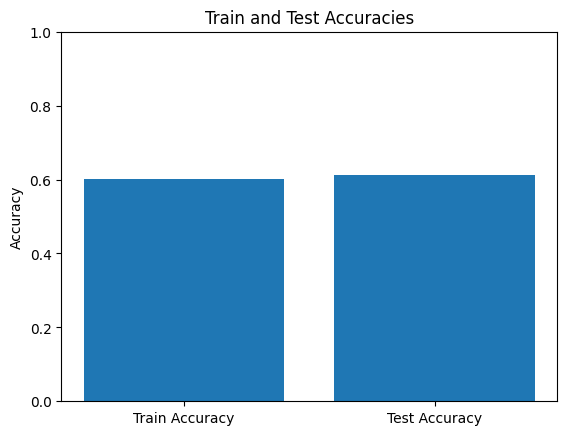

Classification Report:
                    precision    recall  f1-score   support

BACKGROUND_Google       0.17      0.90      0.29        93
            Faces       0.70      0.98      0.82        87
       Faces_easy       0.97      0.99      0.98        87
         Leopards       0.91      1.00      0.95        40
       Motorbikes       0.92      0.99      0.95       160
        accordion       1.00      0.91      0.95        11
        airplanes       0.79      0.97      0.87       160
           anchor       0.00      0.00      0.00         8
              ant       1.00      0.12      0.22         8
           barrel       0.00      0.00      0.00         9
             bass       1.00      0.18      0.31        11
           beaver       0.00      0.00      0.00         9
        binocular       1.00      0.86      0.92         7
           bonsai       0.78      0.54      0.64        26
            brain       0.75      0.60      0.67        20
     brontosaurus       0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Path to the pre-split train, validation, and test directories
train_dir = 'caltech-101/train'
val_dir = 'caltech-101/validation'
test_dir = 'caltech-101/test'

# Parameters for image resizing and PCA
image_size = (64, 64)  # Desired image size for resizing

# Function to load and preprocess images from a directory
def preprocess_images(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)
            image = image.flatten()  # Flatten the image into a 1D array
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Preprocess train data
train_images, train_labels = preprocess_images(train_dir)

# Preprocess validation data
val_images, val_labels = preprocess_images(val_dir)

# Preprocess test data
test_images, test_labels = preprocess_images(test_dir)

# Create an instance of PCA
pca = PCA(n_components=100)  # Specify the number of components to keep

# Fit PCA on the training data
pca.fit(train_images)

# Transform train, validation, and test data to the lower-dimensional space
train_images_pca = pca.transform(train_images)
val_images_pca = pca.transform(val_images)
test_images_pca = pca.transform(test_images)

# Create an instance of SVM classifier
svm = SVC(C=1.0, kernel='rbf', gamma='scale')

# Fit the SVM classifier on the train data
svm.fit(train_images_pca, train_labels)

# Predict the labels for the training data
train_predictions = svm.predict(train_images_pca)

# Evaluate accuracy on the training set
train_accuracy = accuracy_score(train_labels, train_predictions)

# Predict the labels for the test data
test_predictions = svm.predict(test_images_pca)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(test_labels, test_predictions)

# Create a bar chart to visualize train and test accuracies
labels = ['Train Accuracy', 'Test Accuracy']
accuracies = [train_accuracy, test_accuracy]

plt.bar(labels, accuracies)
plt.ylim([0, 1])  # Set the y-axis limit to 0-1
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies')
plt.show()

# Generate classification report on the test set
classification_rep = classification_report(test_labels, test_predictions)
print("Classification Report:\n", classification_rep)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                    precision    recall  f1-score   support

BACKGROUND_Google       0.12      0.71      0.21        94
            Faces       0.53      0.86      0.66        94
       Faces_easy       0.96      0.94      0.95        87
         Leopards       0.90      1.00      0.95        44
       Motorbikes       0.80      0.93      0.86       159
        accordion       0.88      0.58      0.70        12
        airplanes       0.70      0.94      0.80       157
           anchor       0.00      0.00      0.00         8
              ant       0.00      0.00      0.00         6
           barrel       0.00      0.00      0.00        11
             bass       0.00      0.00      0.00         5
           beaver       0.00      0.00      0.00         7
        binocular       0.33      0.25      0.29         4
           bonsai       0.29      0.32      0.30        22
            brain       0.53      0.30      0.38        30
     brontosaurus       0.00   

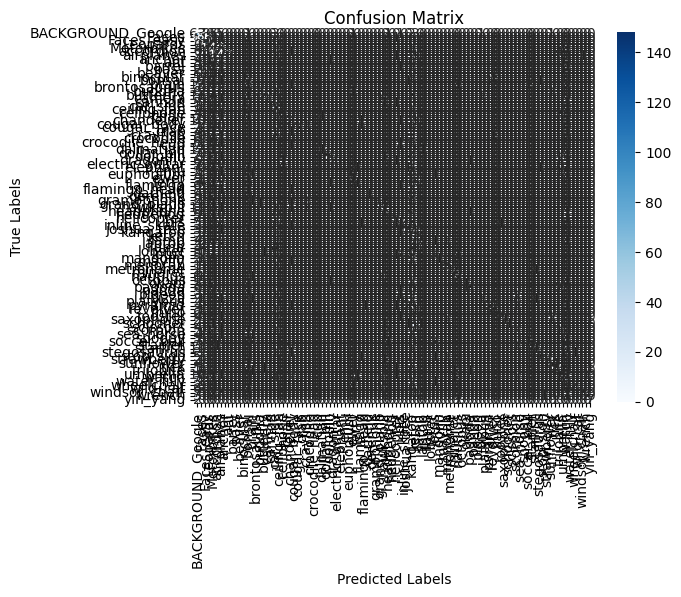

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the test data
test_predictions = svm.predict(test_images_pca)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(test_labels, test_predictions)

# Generate classification report on the test set
classification_rep = classification_report(test_labels, test_predictions)
print("Classification Report:\n", classification_rep)

# Generate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Plot confusion matrix as heatmap
class_names = np.unique(test_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(train_accuracy, test_accuracy):
    x = [1, 2]  # X-axis values for train and test accuracy
    y_train = [train_accuracy, train_accuracy]  # Y-axis values for train accuracy (repeated)
    y_test = [test_accuracy, test_accuracy]  # Y-axis values for test accuracy (repeated)

    plt.plot(x, y_train, label='Training Accuracy')
    plt.plot(x, y_test, label='Test Accuracy')
    plt.xticks(x, ['Training', 'Test'])
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy vs Test Accuracy')
    plt.legend()
    plt.show()

# Your code for fitting the SVM model and obtaining the accuracy values

# Fit the SVM classifier on the train data
svm.fit(train_images_pca, train_labels)

# Obtain the predicted labels for the training data
train_predictions = svm.predict(train_images_pca)

# Calculate the training accuracy
train_accuracy = accuracy_score(train_labels, train_predictions)
print("Train Accuracy:", train_accuracy)

# Obtain the predicted labels for the test data
test_predictions = svm.predict(test_images_pca)

# Calculate the test accuracy
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

# Plot the training and test accuracy
plot_accuracy(train_accuracy, test_accuracy)


In [22]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Rest of your code for preprocessing and fitting the SVM model

# Calculate the F1 score for the training set
train_f1_score = f1_score(train_labels, train_predictions, average='weighted')
print("Train F1 Score:", train_f1_score)

# Calculate the F1 score for the test set
test_f1_score = f1_score(test_labels, test_predictions, average='weighted')
print("Test F1 Score:", test_f1_score)

# Generate classification report on the training set
train_classification_rep = classification_report(train_labels, train_predictions)
print("Training Classification Report:\n", train_classification_rep)

# Generate classification report on the test set
test_classification_rep = classification_report(test_labels, test_predictions)
print("Test Classification Report:\n", test_classification_rep)


Train F1 Score: 0.5907093386820035
Test F1 Score: 0.6000291679964844


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Classification Report:
                    precision    recall  f1-score   support

BACKGROUND_Google       0.17      0.90      0.28       392
            Faces       0.65      0.98      0.78       365
       Faces_easy       0.98      0.98      0.98       365
         Leopards       0.87      1.00      0.93       168
       Motorbikes       0.92      0.96      0.94       671
        accordion       0.89      0.85      0.87        46
        airplanes       0.75      0.98      0.85       672
           anchor       1.00      0.06      0.11        35
              ant       1.00      0.09      0.16        35
           barrel       1.00      0.03      0.05        39
             bass       1.00      0.20      0.33        45
           beaver       1.00      0.13      0.23        39
        binocular       0.95      0.68      0.79        28
           bonsai       0.67      0.63      0.65       108
            brain       0.71      0.66      0.68        82
     brontosaurus     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import time

# Rest of your code for preprocessing and fitting the SVM model

# Calculate the inference time for the training set
start_time = time.time()
train_predictions = svm.predict(train_images_pca)
end_time = time.time()
train_inference_time = end_time - start_time
print("Training Inference Time:", train_inference_time)

# Calculate the inference time for the test set
start_time = time.time()
test_predictions = svm.predict(test_images_pca)
end_time = time.time()
test_inference_time = end_time - start_time
print("Test Inference Time:", test_inference_time)

# Rest of your code for evaluating accuracy and generating classification report


Training Inference Time: 18.809581518173218
Test Inference Time: 4.184535503387451


In [ ]:
# Calculate the training time
start_time = time.time()
svm.fit(train_images_pca, train_labels)
end_time = time.time()
training_time = end_time - start_time
print("Training Time:", training_time)

Training Time: 11.19226360321045


In [24]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import time

# Rest of your code for preprocessing and fitting the SVM model

# Measure the overall training time
start_time = time.time()

# Data loading and preprocessing steps
train_images, train_labels = preprocess_images(train_dir)
train_images_pca = pca.transform(train_images)

# Fit the SVM classifier on the train data
svm.fit(train_images_pca, train_labels)

end_time = time.time()
training_time = end_time - start_time
print("Training Time:", training_time)

# Rest of your code for evaluating accuracy, generating classification report, and inference time


Training Time: 18.910081148147583


In [25]:
# Measure the inference time for the training set
start_time = time.time()
train_predictions = svm.predict(train_images_pca)
end_time = time.time()
train_inference_time = end_time - start_time
print("Training Inference Time:", train_inference_time)

# Measure the inference time for the test set
start_time = time.time()
test_predictions = svm.predict(test_images_pca)
end_time = time.time()
test_inference_time = end_time - start_time
print("Test Inference Time:", test_inference_time)

Training Inference Time: 18.265819311141968
Test Inference Time: 3.823190450668335


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                    precision    recall  f1-score   support

BACKGROUND_Google       0.12      0.71      0.21        94
            Faces       0.52      0.86      0.65        94
       Faces_easy       0.96      0.94      0.95        87
         Leopards       0.90      0.98      0.93        44
       Motorbikes       0.82      0.93      0.87       159
        accordion       0.88      0.58      0.70        12
        airplanes       0.69      0.94      0.79       157
           anchor       0.00      0.00      0.00         8
              ant       0.00      0.00      0.00         6
           barrel       0.00      0.00      0.00        11
             bass       0.00      0.00      0.00         5
           beaver       0.00      0.00      0.00         7
        binocular       0.33      0.25      0.29         4
           bonsai       0.29      0.32      0.30        22
            brain       0.53      0.30      0.38        30
     brontosaurus       0.00   

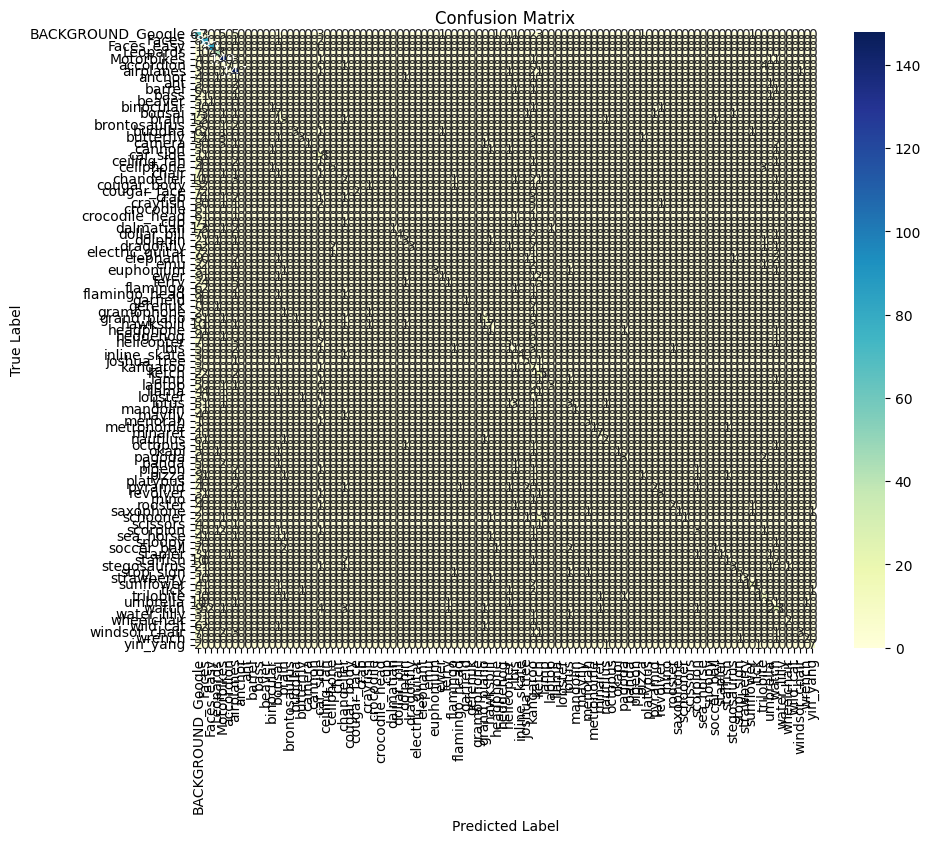

In [36]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Rest of your code...

# Generate classification report on the test set
classification_rep = classification_report(test_labels, test_predictions)
print("Classification Report:\n", classification_rep)

# Get the list of class labels
class_labels = np.unique(test_labels)

# Create a confusion matrix
confusion_matrix = np.zeros((len(class_labels), len(class_labels)), dtype=int)
for true_label, predicted_label in zip(test_labels, test_predictions):
    true_index = np.where(class_labels == true_label)[0][0]
    pred_index = np.where(class_labels == predicted_label)[0][0]
    confusion_matrix[true_index][pred_index] += 1

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Train Accuracy: 0.60187475589116
Validation Accuracy: 0.46958304853041694
Test Accuracy: 0.6129032258064516


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


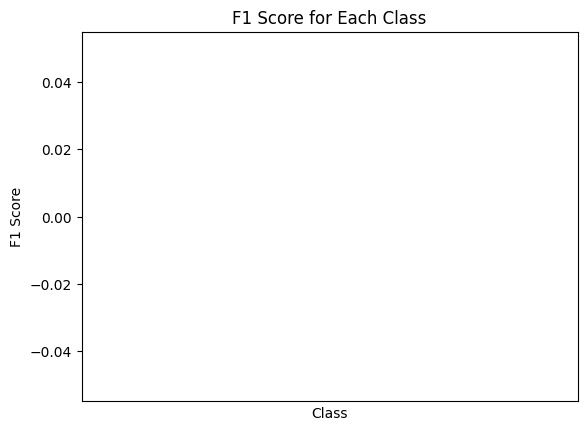

In [28]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Path to the pre-split train, validation, and test directories
train_dir = 'caltech-101/train'
val_dir = 'caltech-101/validation'
test_dir = 'caltech-101/test'

# Parameters for image resizing and PCA
image_size = (64, 64)  # Desired image size for resizing

# Function to load and preprocess images from a directory
def preprocess_images(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)
            image = image.flatten()  # Flatten the image into a 1D array
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Preprocess train data
train_images, train_labels = preprocess_images(train_dir)

# Preprocess validation data
val_images, val_labels = preprocess_images(val_dir)

# Preprocess test data
test_images, test_labels = preprocess_images(test_dir)

# Create an instance of PCA
pca = PCA(n_components=100)  # Specify the number of components to keep

# Fit PCA on the training data
pca.fit(train_images)

# Transform train, validation, and test data to the lower-dimensional space
train_images_pca = pca.transform(train_images)
val_images_pca = pca.transform(val_images)
test_images_pca = pca.transform(test_images)

# Create an instance of SVM classifier
svm = SVC(C=1.0, kernel='rbf', gamma='scale')

# Fit the SVM classifier on the train data
svm.fit(train_images_pca, train_labels)

# Predict the labels for the training data
train_predictions = svm.predict(train_images_pca)

# Evaluate accuracy on the training set
train_accuracy = accuracy_score(train_labels, train_predictions)
print("Train Accuracy:", train_accuracy)

# Predict the labels for the validation data
val_predictions = svm.predict(val_images_pca)

# Evaluate accuracy on the validation set
val_accuracy = accuracy_score(val_labels, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Predict the labels for the test data
test_predictions = svm.predict(test_images_pca)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

# Generate classification report on the test set
classification_rep = classification_report(test_labels, test_predictions, output_dict=True)

# Extract F1 scores and class names from the classification report
f1_scores = [classification_rep[label]['f1-score'] for label in classification_rep.keys() if label.isdigit()]
class_names = [str(label) for label in classification_rep.keys() if label.isdigit()]

# Plotting the F1 scores
plt.bar(np.arange(len(class_names)), f1_scores)
plt.xticks(np.arange(len(class_names)), class_names)
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Class')
plt.show()


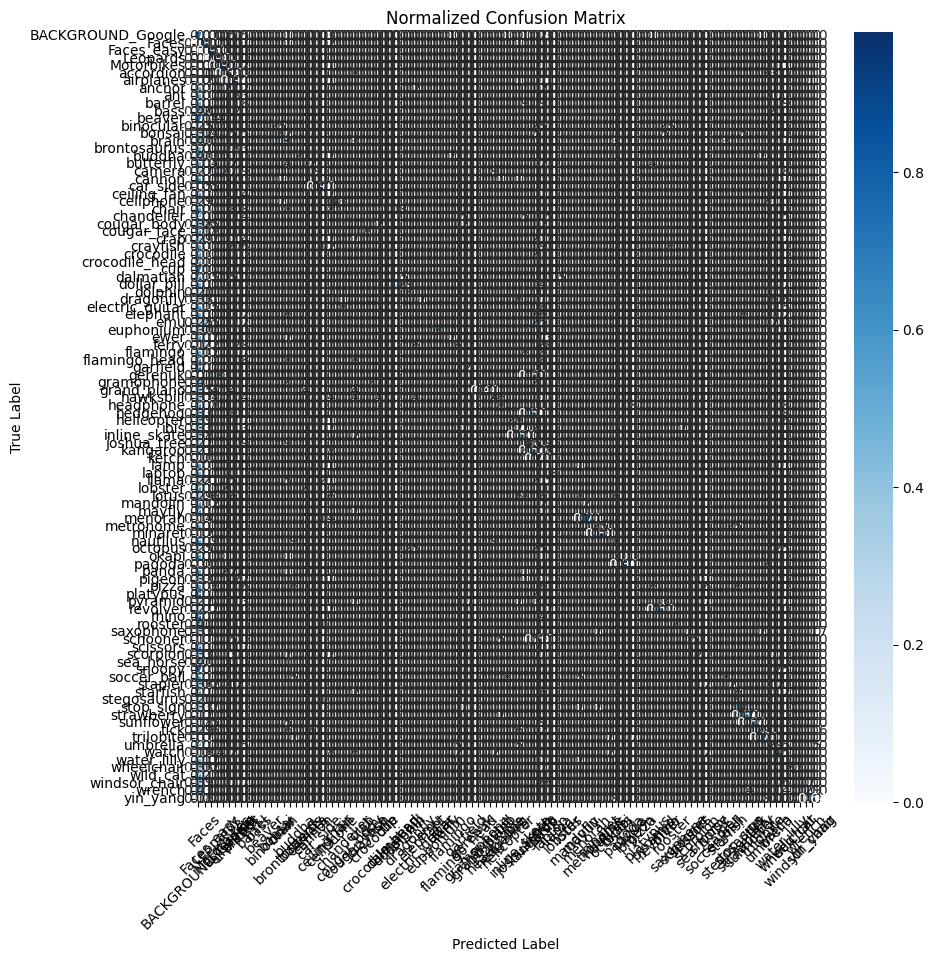

In [39]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Rest of your code...

# Compute the confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define the class labels
classes = np.unique(test_labels)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the normalized confusion matrix as a heatmap
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', xticklabels=classes, yticklabels=classes, ax=ax)

# Set axis labels and title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Normalized Confusion Matrix')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


DO NOT USE CODE UNDER HERE


In [ ]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA

# Path to the pre-split train, validation, and test directories
train_dir = 'extracted_files/train'
val_dir = 'extracted_files/validation'
test_dir = 'extracted_files/test'

# Parameters for image resizing and PCA
image_size = (64, 64)  # Desired image size for resizing

# Function to load and preprocess images from a directory
def preprocess_images(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, image_size)
            image = image.flatten()  # Flatten the image into a 1D array
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Preprocess train data
train_images, train_labels = preprocess_images(train_dir)

# Preprocess validation data
val_images, val_labels = preprocess_images(val_dir)

# Preprocess test data
test_images, test_labels = preprocess_images(test_dir)

# Combine train and validation data for PCA
combined_images = np.vstack((train_images, val_images))

# Create an instance of PCA
pca = PCA(n_components=100)  # Specify the number of components to keep

# Fit PCA on the combined data
pca.fit(combined_images)

# Transform train and test data to the lower-dimensional space
train_images_pca = pca.transform(train_images)
test_images_pca = pca.transform(test_images)

# Access the explained variance ratio and principal components
explained_variance_ratio = pca.explained_variance_ratio_
principal_components = pca.components_

# Print the explained variance ratio and principal components
print("Explained Variance Ratio:", explained_variance_ratio)
print("Principal Components:", principal_components)


Explained Variance Ratio: [0.39288963 0.07389746 0.04919789 0.02798957 0.02387606 0.02378119
 0.01733179 0.01371163 0.01256784 0.01111382 0.01002065 0.00864008
 0.00852343 0.00693253 0.0067686  0.00638119 0.00620465 0.00560923
 0.00485234 0.00481035 0.00463627 0.003961   0.00367731 0.0034223
 0.00338181 0.00316896 0.00304132 0.00298986 0.00279767 0.00277421
 0.00259401 0.00257334 0.00253293 0.00229646 0.00228712 0.0021416
 0.00206956 0.00197196 0.001932   0.00191916 0.00186554 0.00177482
 0.00174723 0.00169935 0.00163205 0.0015926  0.00155957 0.00150175
 0.00148268 0.00143428 0.00138322 0.00136946 0.00133833 0.00133522
 0.00131253 0.00127663 0.00124854 0.00123699 0.00121352 0.00119196
 0.00117198 0.00115849 0.00109971 0.00109314 0.00107159 0.00105463
 0.0010251  0.00098696 0.00098312 0.00097065 0.00094924 0.00094552
 0.00092787 0.00090528 0.00089353 0.00088611 0.00086982 0.00085513
 0.00083748 0.00081939 0.00080867 0.00080267 0.00079309 0.00078296
 0.00077155 0.00076105 0.00075058 0.00

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)  # Specify the number of neighbors (k)

# Fit the KNN classifier on the train data
knn.fit(train_images_pca, train_labels)

# Predict the labels for the test data
predictions = knn.predict(test_images_pca)

# Evaluate the accuracy of the KNN classifier
accuracy = knn.score(test_images_pca, test_labels)

# Print the predictions and accuracy
print("Predictions:", predictions)
print("Accuracy:", accuracy)


Predictions: ['Faces_easy' 'Motorbikes' 'Faces_easy' ... 'Faces_easy' 'Faces_easy'
 'Faces']
Accuracy: 0.18534718425369054


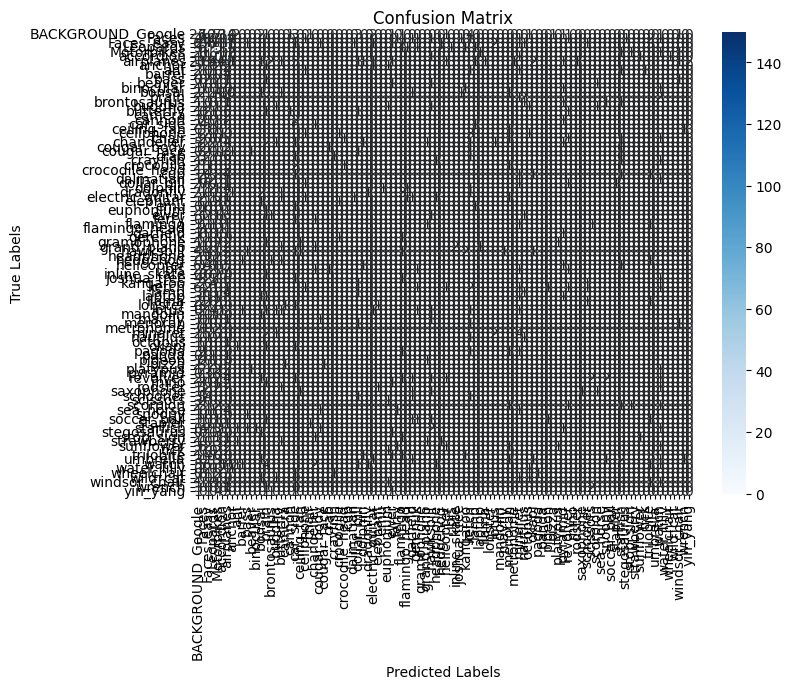

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Get the unique class labels
unique_labels = np.unique(test_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(test_labels, predictions)

# Print the classification report
print(report)


                   precision    recall  f1-score   support

BACKGROUND_Google       0.11      0.27      0.15        97
            Faces       0.14      0.29      0.18        97
       Faces_easy       0.14      0.33      0.20        92
         Leopards       0.15      0.41      0.22        29
       Motorbikes       0.57      0.86      0.69       175
        accordion       0.00      0.00      0.00         6
        airplanes       0.19      0.41      0.26       166
           anchor       0.00      0.00      0.00        15
              ant       0.00      0.00      0.00        13
           barrel       0.00      0.00      0.00         7
             bass       0.00      0.00      0.00         8
           beaver       0.00      0.00      0.00         8
        binocular       0.00      0.00      0.00         6
           bonsai       0.08      0.04      0.05        25
            brain       0.12      0.19      0.14        16
     brontosaurus       0.00      0.00      0.00       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV 

# Path to the preprocessed train and test directories
train_dir = 'extracted_files/train'
test_dir = 'extracted_files/test'

# Parameters for image resizing
image_size = (64, 64)  # Desired image size for resizing

# Function to load and preprocess images from a directory
def preprocess_images(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, image_size)
            image = image.flatten()  # Flatten the image into a 1D array
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Preprocess train data
train_images_pca, train_labels = preprocess_images(train_dir)

# Preprocess test data
test_images_pca, test_labels = preprocess_images(test_dir)

# Split the train data into train and validation sets
train_images_pca, val_images, train_labels, val_labels = train_test_split(
    train_images_pca, train_labels, test_size=0.2, random_state=42
)

param_grid = [
  {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [0.1, 1, 10, 100, 1000], 'degree': [3, 4, 5, 6], 'kernel': ['poly']},
 ]
svm = SVC()
grid_search = GridSearchCV(svm, param_grid)
grid_search.fit(train_images_pca, train_labels)
grid_search.cv_results_

# Create an instance of SVM classifier
svm = SVC()

# Fit the SVM classifier on the train data
svm.fit(train_images_pca, train_labels)

# Predict the labels for the validation data
val_predictions = svm.predict(val_images)

# Evaluate accuracy on the validation set
val_accuracy = accuracy_score(val_labels, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Predict the labels for the test data
test_predictions = svm.predict(test_images_pca)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

# Generate classification report on the test set
classification_rep = classification_report(test_labels, test_predictions)
print("Classification Report:\n", classification_rep)


Validation Accuracy: 0.4184457728437233
Test Accuracy: 0.4084199015855659
Classification Report:
                    precision    recall  f1-score   support

BACKGROUND_Google       0.10      0.63      0.18        97
            Faces       0.49      0.85      0.62        97
       Faces_easy       0.94      0.95      0.94        92
         Leopards       0.78      0.97      0.86        29
       Motorbikes       0.79      0.92      0.85       175
        accordion       0.67      0.67      0.67         6
        airplanes       0.42      0.97      0.59       166
           anchor       0.00      0.00      0.00        15
              ant       0.00      0.00      0.00        13
           barrel       0.00      0.00      0.00         7
             bass       0.00      0.00      0.00         8
           beaver       0.00      0.00      0.00         8
        binocular       0.00      0.00      0.00         6
           bonsai       0.28      0.20      0.23        25
            brai

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


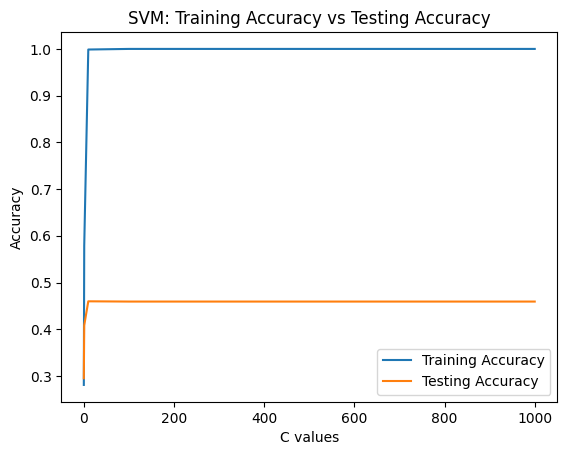

In [ ]:
import matplotlib.pyplot as plt

# Range of C values to evaluate
c_values = [0.1, 1, 10, 100, 1000]

# Lists to store the training and testing accuracies
train_accuracies = []
test_accuracies = []

# Iterate over different C values
for c in c_values:
    # Create an instance of SVM classifier with the current C value
    svm = SVC(C=c)
    
    # Fit the SVM classifier on the train data
    svm.fit(train_images, train_labels)
    
    # Predict the labels for the train data
    train_predictions = svm.predict(train_images)
    
    # Predict the labels for the test data
    test_predictions = svm.predict(test_images)
    
    # Compute and store the training accuracy
    train_accuracy = accuracy_score(train_labels, train_predictions)
    train_accuracies.append(train_accuracy)
    
    # Compute and store the testing accuracy
    test_accuracy = accuracy_score(test_labels, test_predictions)
    test_accuracies.append(test_accuracy)

# Plot the training and testing accuracies
plt.plot(c_values, train_accuracies, label='Training Accuracy')
plt.plot(c_values, test_accuracies, label='Testing Accuracy')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('SVM: Training Accuracy vs Testing Accuracy')
plt.legend()
plt.show()


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Path to the preprocessed train and test directories
train_dir = 'extracted_files/train'
test_dir = 'extracted_files/test'

# Parameters for image resizing
image_size = (64, 64)  # Desired image size for resizing

# Function to load and preprocess images from a directory
def preprocess_images(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)
            image = image.flatten()  # Flatten the image into a 1D array
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Preprocess train data
train_images_pca, train_labels = preprocess_images(train_dir)

# Preprocess test data
test_images_pca, test_labels = preprocess_images(test_dir)

# Split the train data into train and validation sets
train_images_pca, val_images, train_labels, val_labels = train_test_split(
    train_images_pca, train_labels, test_size=0.2, random_state=42
)

# Create an instance of SVM classifier
svm = SVC(C=1.0, kernel='rbf', gamma='scale')

# Fit the SVM classifier on the train data
svm.fit(train_images_pca, train_labels)

# Predict the labels for the validation data
val_predictions = svm.predict(val_images)

# Evaluate accuracy on the validation set
val_accuracy = accuracy_score(val_labels, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Predict the labels for the test data
test_predictions = svm.predict(test_images_pca)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

# Generate classification report on the test set
classification_rep = classification_report(test_labels, test_predictions)
print("Classification Report:\n", classification_rep)


Validation Accuracy: 0.4363791631084543
Test Accuracy: 0.4078731547293603
Classification Report:
                    precision    recall  f1-score   support

BACKGROUND_Google       0.11      0.81      0.20        89
            Faces       0.48      0.89      0.63        85
       Faces_easy       0.93      0.98      0.95        86
         Leopards       0.79      1.00      0.88        37
       Motorbikes       0.81      0.92      0.86       159
        accordion       1.00      0.12      0.22        16
        airplanes       0.54      0.95      0.69       149
           anchor       0.00      0.00      0.00         6
              ant       0.00      0.00      0.00        11
           barrel       0.00      0.00      0.00         7
             bass       0.00      0.00      0.00        11
           beaver       0.00      0.00      0.00        12
        binocular       1.00      0.17      0.29         6
           bonsai       0.37      0.25      0.30        28
            brai

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


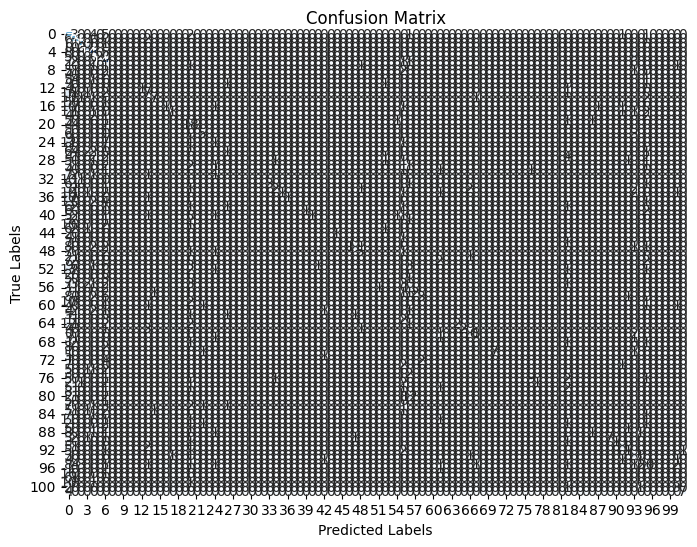

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Path to the preprocessed train and test directories
train_dir = 'extracted_files/train'
test_dir = 'extracted_files/test'

# Parameters for image resizing
image_size = (64, 64)  # Desired image size for resizing

# Function to load and preprocess images from a directory
def preprocess_images(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)
            image = image.flatten()  # Flatten the image into a 1D array
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Preprocess train data
train_images_pca, train_labels = preprocess_images(train_dir)

# Preprocess test data
test_images_pca, test_labels = preprocess_images(test_dir)

# Split the train data into train and validation sets
train_images_pca, val_images, train_labels, val_labels = train_test_split(
    train_images_pca, train_labels, test_size=0.2, random_state=42
)

# Create an instance of SVM classifier
svm = SVC(C=1.0, kernel='rbf', gamma='scale')

# Fit the SVM classifier on the train data
svm.fit(train_images_pca, train_labels)

# Predict the labels for the test data
test_predictions = svm.predict(test_images_pca)

# Create confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


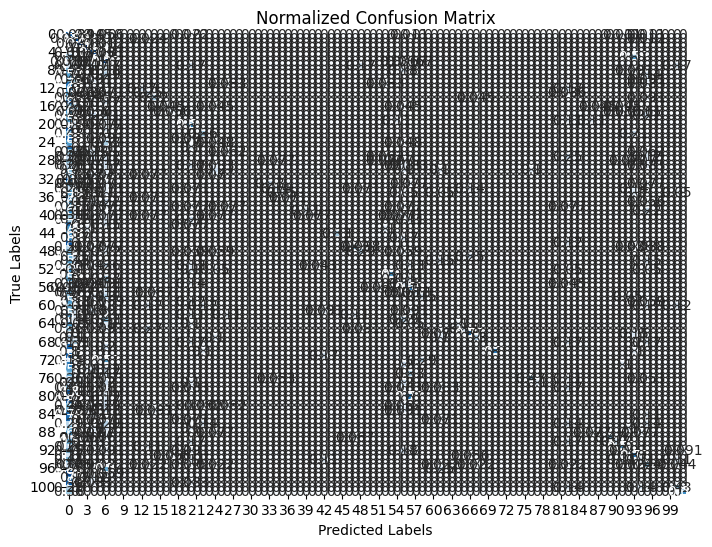

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Path to the preprocessed train and test directories
train_dir = 'extracted_files/train'
test_dir = 'extracted_files/test'

# Parameters for image resizing
image_size = (64, 64)  # Desired image size for resizing

# Function to load and preprocess images from a directory
def preprocess_images(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)
            image = image.flatten()  # Flatten the image into a 1D array
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Preprocess train data
train_images_pca, train_labels = preprocess_images(train_dir)

# Preprocess test data
test_images_pca, test_labels = preprocess_images(test_dir)

# Split the train data into train and validation sets
train_images_pca, val_images, train_labels, val_labels = train_test_split(
    train_images_pca, train_labels, test_size=0.2, random_state=42
)

# Create an instance of SVM classifier
svm = SVC(C=1.0, kernel='rbf', gamma='scale')

# Fit the SVM classifier on the train data
svm.fit(train_images_pca, train_labels)

# Predict the labels for the test data
test_predictions = svm.predict(test_images_pca)

# Create confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', cbar=False)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
# Fit the SVM classifier on the train data
svm.fit(train_images_pca, train_labels)

# Predict the labels for the train data
train_predictions = svm.predict(train_images_pca)

# Evaluate accuracy on the train set
train_accuracy = accuracy_score(train_labels, train_predictions)
print("Train Accuracy:", train_accuracy)

# Predict the labels for the test data
test_predictions = svm.predict(test_images_pca)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Path to the preprocessed train and test directories
train_dir = 'extracted_files/train'
test_dir = 'extracted_files/test'

# Parameters for image resizing
image_size = (64, 64)  # Desired image size for resizing

# Function to load and preprocess images from a directory
def preprocess_images(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)
            image = image.flatten()  # Flatten the image into a 1D array
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Preprocess train data
train_images_pca, train_labels = preprocess_images(train_dir)

# Preprocess test data
test_images_pca, test_labels = preprocess_images(test_dir)

# Split the train data into train and validation sets
train_images_pca, val_images, train_labels, val_labels = train_test_split(
    train_images_pca, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

# Create an instance of SVM classifier
svm = SVC(C=1.0, kernel='rbf', gamma='scale')

# Fit the SVM classifier on the train data
svm.fit(train_images_pca, train_labels)

# Predict the labels for the training data
train_predictions = svm.predict(train_images_pca)

# Evaluate accuracy on the training set
train_accuracy = accuracy_score(train_labels, train_predictions)
print("Train Accuracy:", train_accuracy)

# Predict the labels for the validation data
val_predictions = svm.predict(val_images)

# Evaluate accuracy on the validation set
val_accuracy = accuracy_score(val_labels, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Predict the labels for the test data
test_predictions = svm.predict(test_images_pca)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

# Generate classification report on the test set
classification_rep = classification_report(test_labels, test_predictions)
print("Classification Report:\n", classification_rep)


Train Accuracy: 0.6447340311899167
Validation Accuracy: 0.426131511528608
Test Accuracy: 0.419901585565883
Classification Report:
                    precision    recall  f1-score   support

BACKGROUND_Google       0.10      0.81      0.18        88
            Faces       0.56      0.91      0.69        90
       Faces_easy       0.99      0.96      0.97        96
         Leopards       0.77      1.00      0.87        33
       Motorbikes       0.76      0.91      0.83       158
        accordion       0.80      0.29      0.42        14
        airplanes       0.55      0.96      0.70       153
           anchor       0.00      0.00      0.00         6
              ant       0.00      0.00      0.00         9
           barrel       0.00      0.00      0.00        10
             bass       0.00      0.00      0.00         8
           beaver       0.00      0.00      0.00         7
        binocular       0.00      0.00      0.00        14
           bonsai       0.69      0.29    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
